<a href="https://colab.research.google.com/github/bardagan/logo_classifier/blob/master/create_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create and save data set

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

## **Creating Data Set**

install chromium, its driver, and selenium:

In [16]:
!apt update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install google_images_download

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
146 packages can be upgraded. Run 'a

Set option to be headless

In [0]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('–headless')
options.add_argument('–no-sandbox')
options.add_argument('–disable-dev-shm-usage')

### Connect to Google **Drive**

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Get Images

In [0]:
MAX_NUMBER_OF_IMAGES = 100
path = "/content/drive/My Drive/data/"
path += "logos/"
brands = ['starkey', 'mishcon']

In [22]:
for brand in brands:
  keyword = brand + " logo"
  folder_path = path + brand
  !googleimagesdownload -o "{folder_path}" --chromedriver '/usr/bin/chromedriver' -n -l {MAX_NUMBER_OF_IMAGES} -k "{keyword}"


Item no.: 1 --> Item name = starkey logo
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.header-logo.svg
Completed Image ====> 2.starkey.jpg
Completed Image ====> 3.starkey-logo.png
Completed Image ====> 4.StarkeyLogo-350x350.png
Completed Image ====> 5.starkey-logo-5DD0F56C64-seeklogo.com.png
Completed Image ====> 6.starkey-logo-transparent.png
Completed Image ====> 7.tl-starkey-hear-better-live-better.jpg
Completed Image ====> 8.508596.png
Completed Image ====> 9.StarkeyLogo.jpg
Completed Image ====> 10.Starkey-Logo.jpg
Completed Image ====> 11.Starkey-hearing-aids-logo.jpg
Completed Image ====> 12.Starkey-logo.png
Completed Image ====> 13.logo3.jpg
Completed Image ====> 14.2a08583bc41462d5fea2e5b958fbcb13.jpg
Completed Image ====> 15.Starkey_Hearing_Foundation_logo.png
Completed Image ====> 16.footer-ahh-logo.png
Completed Image ====> 17.new-starkey-logo.png
Completed Image ====> 18.Starkey_

In [0]:
!googleimagesdownload -o "/content/drive/My Drive/data/logos/nike" --chromedriver '/usr/bin/chromedriver' -n -l {MAX_NUMBER_OF_IMAGES} -k "nike logo"

In [0]:
path = pathlib.Path('/content/drive/My Drive/data/logos')


In [0]:
classes = ['adidas','nike']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## Looking at the data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, bs=16,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

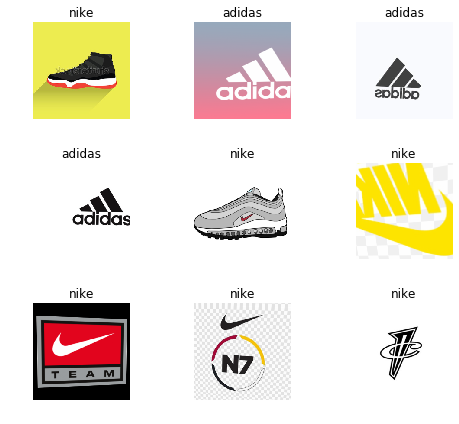

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['adidas', 'nike']


(2, 2)